<a href="https://colab.research.google.com/github/rida-manzoor/DL/blob/main/Early_Stopping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Early Stopping

In machine learning, early stopping is a form of regularization used to avoid overfitting when training a learner with an iterative method, such as gradient descent. Such methods update the learner so as to make it better fit the training data with each iteration.



```
keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=0,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)
```

**monitor:** Quantity to be monitored. Defaults to "val_loss".

**min_delta:** Minimum change in the monitored quantity to qualify as an improvement, i.e. an absolute change of less than min_delta, will count as no improvement. Defaults to 0.

**patience:** Number of epochs with no improvement after which training will be stopped. Defaults to 0.

**verbose:** Verbosity mode, 0 or 1. Mode 0 is silent, and mode 1 displays messages when the callback takes an action. Defaults to 0.

**mode:** One of {"auto", "min", "max"}. In min mode, training will stop when the quantity monitored has stopped decreasing; in "max" mode it will stop when the quantity monitored has stopped increasing; in "auto" mode, the direction is automatically inferred from the name of the monitored quantity. Defaults to "auto".

**baseline:** Baseline value for the monitored quantity. If not None, training will stop if the model doesn't show improvement over the baseline. Defaults to None.

[Early Stopping | but when?](https://page.mi.fu-berlin.de/prechelt/Biblio/stop_tricks1997.pdf)


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Preprocess the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build a simple neural network with Dropout
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),  # Dropout layer with 20% dropout rate
    Dense(32, activation='relu'),
    Dropout(0.2),  # Dropout layer with 20% dropout rate
    Dense(3, activation='softmax')  # Output layer for 3 classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define EarlyStopping callback
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, callbacks=[early_stopping])

# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')


Epoch 1/50


C:\Users\Admin\anaconda3\envs\DL0\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 104ms/step - accuracy: 0.2711 - loss: 1.2183 - val_accuracy: 0.5833 - val_loss: 1.0222
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.3240 - loss: 1.0757 - val_accuracy: 0.8333 - val_loss: 0.9752
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4102 - loss: 1.0583 - val_accuracy: 0.8333 - val_loss: 0.9301
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6492 - loss: 0.9542 - val_accuracy: 0.7500 - val_loss: 0.8850
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5909 - loss: 0.9347 - val_accuracy: 0.8333 - val_loss: 0.8438
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7066 - loss: 0.8323 - val_accuracy: 0.8333 - val_loss: 0.8044
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7203 - loss: 0.7887 - val_accuracy: 0.8333 - val_loss: 0.7663
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7476 - loss: 0.7451 - val_accuracy: 0.8333 - val_loss: 0.7285
Epoch 9/50

# Improving Neural Network

1. If Vanishing Gradient
    1. Change Activation Function
    2. Weight Initialization
2. Overfitting
    1. Reduce complexity/Increase Data
    2. Dropout layers
    3. Regularization
    4. Early Stopping
3. Normalization
    1. Normalizing input
    2. Batch Normalization
    3. Normalizing Activation

4. Gradient checking and clipping
5. Optimizer
    1. Momentum
    2. RMSProp
    3. Adagrade
    4.

# Normalizing

## Normalizing inputs

Why Normalization?
If all input features are not on same scale, during back propagation model will start giving more importance to one feature, neglecting other features. Model will converge slower.

**Standardization**
$$
\frac{x_i - x_μ}{σ}
$$

- Mean centering data (Mean zero, std 1)
- -1 to 1

**Normalization**
$$
\frac{x_i - x_(min)}{x_(max)-x_(min)}
$$

- Unit box(min 0, max 1)
- 0 to 1

If we know Maximum and minimum values of features, we will do normalization, otherwise do standardization.

# Dropout

Dropout is a regularization technique for neural network models proposed by **Srivastava et** al. in their 2014 paper [Dropout: A Simple Way to Prevent Neural Networks from Overfitting](https://www.jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf?utm_content=buffer79b43&utm_medium=social&utm_source=twitter.com&utm_campaign=buffer,). Dropout is a technique where randomly selected neurons are ignored during training. They are “dropped out” randomly.



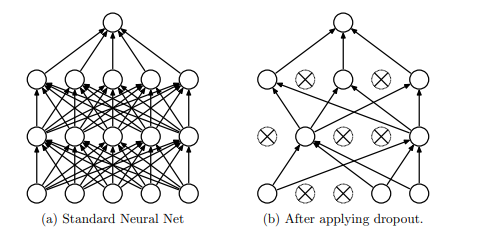

- Random forest Analogy related to neural network

### How prediction work:
if drop out is of 0.25(mean 25% of all nodes turn off during particular epoch) for a layer.
Then after training, if weight of node is 'w', it's final weight will be w(1-p)

Then this weight is used for prediction.

In [1]:
# Build a simple neural network with Dropout
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),  # Dropout layer with 20% dropout rate
    Dense(32, activation='relu'),
    Dropout(0.2),  # Dropout layer with 20% dropout rate
    Dense(3, activation='softmax')  # Output layer for 3 classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)

# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')


Epoch 1/50


C:\Users\Admin\anaconda3\envs\DL0\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.3014 - loss: 1.1290 - val_accuracy: 0.3333 - val_loss: 1.0779
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5178 - loss: 0.9876 - val_accuracy: 0.5833 - val_loss: 1.0280
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6656 - loss: 0.9388 - val_accuracy: 0.5833 - val_loss: 0.9831
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7145 - loss: 0.8832 - val_accuracy: 0.6667 - val_loss: 0.9391
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7448 - loss: 0.8066 - val_accuracy: 0.6667 - val_loss: 0.8957
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7506 - loss: 0.7602 - val_accuracy: 0.7500 - val_loss: 0.8555
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7623 - loss: 0.7196 - val_accuracy: 0.7500 - val_loss: 0.8182
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8632 - loss: 0.6527 - val_accuracy: 0.8333 - val_loss: 0.7836
Epoch 9/50
